# eager execution

In [1]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
tfe.enable_eager_execution()

In [2]:
i = tf.constant(0)
while i < 100:
    i = tf.add(i, 1)
    print('I could do this all day {}'.format(i))

I could do this all day 1
I could do this all day 2
I could do this all day 3
I could do this all day 4
I could do this all day 5
I could do this all day 6
I could do this all day 7
I could do this all day 8
I could do this all day 9
I could do this all day 10
I could do this all day 11
I could do this all day 12
I could do this all day 13
I could do this all day 14
I could do this all day 15
I could do this all day 16
I could do this all day 17
I could do this all day 18
I could do this all day 19
I could do this all day 20
I could do this all day 21
I could do this all day 22
I could do this all day 23
I could do this all day 24
I could do this all day 25
I could do this all day 26
I could do this all day 27
I could do this all day 28
I could do this all day 29
I could do this all day 30
I could do this all day 31
I could do this all day 32
I could do this all day 33
I could do this all day 34
I could do this all day 35
I could do this all day 36
I could do this all day 37
I could do

In [3]:
# 有了eager execution以后，不必担心placeholders, sessions, control dependencies, lazy loading以及{name, variable op} scopes

In [4]:
# 不需要占位符了
x = [[2.]]
m = tf.matmul(x, x)
print(m)

tf.Tensor([[4.]], shape=(1, 1), dtype=float32)


In [5]:
# 避免lazy loading
x = tf.random_uniform([2, 2])
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        print(x[i, j])

tf.Tensor(0.43710816, shape=(), dtype=float32)
tf.Tensor(0.6315615, shape=(), dtype=float32)
tf.Tensor(0.20683658, shape=(), dtype=float32)
tf.Tensor(0.40070772, shape=(), dtype=float32)


In [7]:
# Tensors可以像numpy arrays一样使用
import numpy as np

x = tf.constant([1., 2., 3.])
assert type(x.numpy()) == np.ndarray

In [8]:
squared = np.square(x)
print(squared)

[1. 4. 9.]


In [9]:
# 张量可以被遍历了
for i in x:
    print(i)

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)


In [ ]:
# TensorFlow在Eager模式下反向传播求梯度
# 在tfe中共有四个函数直接服务于反向传播，分别是：tfe.gradients_function, tfe.value_and_gradients_function, tfe.implicit_gradients, tfe.implicit_value_and_gradients。这四个
# 函数的功能类似于python中的函数修饰器

In [10]:
@tfe.gradients_function
def g(x, y):
    return x ** 2 + y ** 2
g(2., 3.)

[<tf.Tensor: id=796, shape=(), dtype=float32, numpy=4.0>,
 <tf.Tensor: id=776, shape=(), dtype=float32, numpy=6.0>]

In [11]:
# 例子
@tfe.gradients_function
def square(x):
    return x ** 2
print(square(3.))

[<tf.Tensor: id=823, shape=(), dtype=float32, numpy=6.0>]


In [12]:
# tfe.gradients_function的功能是对函数的输入参数求导，但在实际使用中，往往更希望对TensorFlow中的变量求导，因为变量中保存的是模型的参数，这些参数
# 才是需要进行优化和梯度下降的部分。tfe.implicit_gradients的功能就是，生成可以对计算过程中用到的变量求导的函数。
vx = tf.get_variable(name='vx', initializer=tf.constant(1.))
vy = tf.get_variable(name='vy', initializer=tf.constant(1.))

@tfe.implicit_gradients
def f(x):
    return 2 * vx * x
print(f(2.))

[(<tf.Tensor: id=859, shape=(), dtype=float32, numpy=4.0>, <tf.Variable 'vx:0' shape=() dtype=float32, numpy=1.0>)]


In [14]:
x = tf.get_variable(name='x', initializer=tf.constant(2.))

def loss(y):
    return (y - x ** 2) ** 2

grad = tfe.implicit_gradients(loss)
print(loss(7.))
print(grad(7.))

tf.Tensor(9.0, shape=(), dtype=float32)
[(<tf.Tensor: id=986, shape=(), dtype=float32, numpy=-24.0>, <tf.Variable 'x:0' shape=() dtype=float32, numpy=2.0>)]


In [15]:
def loss(y):
    return (y - x ** 2) ** 2
value_and_grad = tfe.implicit_value_and_gradients(loss)
print(loss(7.))
print(value_and_grad(7.))

tf.Tensor(9.0, shape=(), dtype=float32)
(<tf.Tensor: id=1013, shape=(), dtype=float32, numpy=9.0>, [(<tf.Tensor: id=1046, shape=(), dtype=float32, numpy=-24.0>, <tf.Variable 'x:0' shape=() dtype=float32, numpy=2.0>)])


## 例子：Huber regression with Eager Execution

In [16]:
import time
import tensorflow as tf
import tensorflow.contrib.eager as tfe
tfe.enable_eager_execution()

In [32]:
import matplotlib.pyplot as plt

In [17]:
file = './birth_life_2010.txt'

In [24]:
def read_data(filename):
    lines = open(filename, 'r').readlines()[1:]
    data = [(line.split('\t')) for line in lines]
    birth = [float(line[1]) for line in data]
    year = [float(line[2]) for line in data]
    data = list(zip(birth, year))
    data = np.asarray(data, dtype='float32')
    return data
data = read_data(file)
print(data)

[[ 1.822    74.82825 ]
 [ 3.869    70.81949 ]
 [ 3.911    72.15066 ]
 [ 5.578    61.999855]
 [ 1.579    73.92766 ]
 [ 4.229    67.465195]
 [ 1.15     81.641464]
 [ 3.86     72.30639 ]
 [ 3.142    68.484314]
 [ 3.951    62.44061 ]
 [ 2.16     80.70244 ]
 [ 2.141    76.30168 ]
 [ 2.002    64.662094]
 [ 2.504    68.19498 ]
 [ 3.451    68.76483 ]
 [ 2.635    74.02456 ]
 [ 1.092    80.775314]
 [ 2.747    67.064   ]
 [ 1.22     80.76195 ]
 [ 1.39     82.932686]
 [ 2.117    68.889656]
 [ 1.108    82.87805 ]
 [ 2.47     75.99427 ]
 [ 2.09     75.07688 ]
 [ 2.668    69.22583 ]
 [ 2.022    68.53214 ]
 [ 1.598    73.273094]
 [ 2.581    62.53622 ]
 [ 2.042    77.93202 ]
 [ 1.92     81.69512 ]
 [ 2.499    68.001   ]
 [ 1.94     80.402435]
 [ 1.445    70.27561 ]
 [ 2.399    64.86351 ]
 [ 2.088    73.696655]
 [ 3.297    67.2599  ]
 [ 1.5      82.24634 ]
 [ 1.98     81.45122 ]
 [ 1.39     81.62683 ]
 [ 1.57     79.42195 ]
 [ 1.4      75.1122  ]
 [ 1.4      73.936584]
 [ 1.54     68.80488 ]
 [ 1.38    

In [25]:
n_samples = data.shape[0]
print(n_samples)

190


In [26]:
# 创建数据集
dataset = tf.data.Dataset.from_tensor_slices((data[:, 0], data[:, 1]))

In [44]:
# 创建权重和偏置项
w = tf.get_variable(name='weights', initializer=tf.constant(0.))
b = tf.get_variable(name='biases', initializer=tf.constant(0.))

In [45]:
# 定义线性方程
def prediction(x):
    logits = w * x + b
    return logits

In [46]:
# 定义损失函数
def squared_loss(y, y_predicted):
    loss_ = tf.reduce_mean(tf.square(y - y_predicted))
    return loss_

In [47]:
# 定义huber loss
def huber_loss(y, y_predicted):
    m = 1.0
    residual = tf.abs(y - y_predicted)
    return 0.5 * tf.square(residual) if residual <= m else m * residual - 0.5 * tf.square(m)

In [48]:
def train(loss_fn):
    print('Training; loss function: ' + loss_fn.__name__)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    
    # 定义要微分的函数
    def loss_for_example(x, y):
        return loss_fn(y, prediction(x))
    
    grad_fn = tfe.implicit_value_and_gradients(loss_for_example)
    
    start = time.time()
    for epoch in range(100):
        total_loss = 0.
        for x_i, y_i in tfe.Iterator(dataset):
            loss, gradients = grad_fn(x_i, y_i)
            optimizer.apply_gradients(gradients)
            total_loss += loss
        if epoch % 10 == 0:
            print('Epoch {0}: loss={1:.3f}'.format(epoch+1, total_loss/n_samples))
    print('Took: {} seconds'.format(time.time() - start))

In [49]:
train(huber_loss)

Training; loss function: huber_loss
Epoch 1: loss=60.696
Epoch 11: loss=29.989
Epoch 21: loss=27.126
Epoch 31: loss=24.320
Epoch 41: loss=21.523
Epoch 51: loss=18.747
Epoch 61: loss=16.022
Epoch 71: loss=13.383
Epoch 81: loss=10.831
Epoch 91: loss=8.408
Took: 16.58404302597046 seconds


In [51]:
train(squared_loss)

Training; loss function: squared_loss
Epoch 1: loss=32.603
Epoch 11: loss=28.503
Epoch 21: loss=28.448
Epoch 31: loss=28.445
Epoch 41: loss=28.445
Epoch 51: loss=28.445
Epoch 61: loss=28.445
Epoch 71: loss=28.445
Epoch 81: loss=28.445
Epoch 91: loss=28.445
Took: 16.27035617828369 seconds


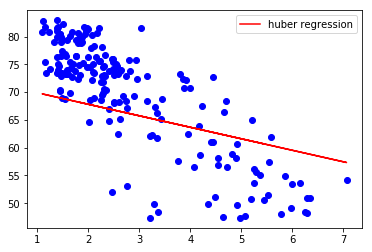

In [50]:
plt.plot(data[:, 0], data[:, 1], 'bo')
plt.plot(data[:, 0], data[:, 0] * w + b, 'r', label='huber regression')
plt.legend()
plt.show()

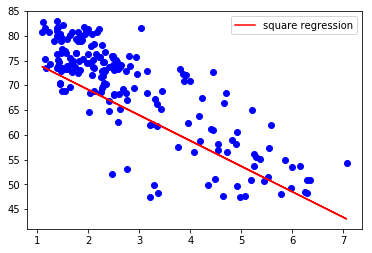

In [52]:
plt.plot(data[:, 0], data[:, 1], 'bo')
plt.plot(data[:, 0], data[:, 0] * w + b, 'r', label='square regression')
plt.legend()
plt.show()